>### **.loc[:,:] vs [:]**

.loc[]와 []로 슬라이싱을 하는 것에는 차이가 있습니다. 일반적으로 []를 사용하여 슬라이싱할 때는 행 인덱스를 기반으로 슬라이싱하게 됩니다. 예를 들어, `df[3:5]`는 행 인덱스가 3에서 4까지 (0부터 시작하는 인덱스 기준)의 행을 선택합니다.

반면에 .loc[]를 사용하여 슬라이싱할 때는 행과 열 모두의 라벨을 기반으로 슬라이싱합니다. 이는 특정 행과 열을 선택할 때 유용합니다. 예를 들어, `df.loc[3:5, 'A':'C']`는 행 인덱스가 3에서 5까지이고 열 라벨이 'A'에서 'C'까지인 영역을 선택합니다.

따라서 .loc[]를 사용하면 라벨을 기반으로 더 유연하게 특정 행과 열을 선택할 수 있습니다.



## 데이터 프레임 정보 요약하기

In [1]:
import gdown
gdown.download('https://bit.ly/3GisL6J', 'ns_book4.csv', quiet=False)

Downloading...
From: https://bit.ly/3GisL6J
To: /content/ns_book4.csv
100%|██████████| 55.5M/55.5M [00:00<00:00, 77.9MB/s]


'ns_book4.csv'

In [2]:
with open('ns_book4.csv') as f:
  for i in range(2):
    print(f.readline(), end = '')

번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,,,,,1,0.0,2021-03-19


In [3]:
import pandas as pd
ns_book4 = pd.read_csv('ns_book4.csv', low_memory = False)
ns_book4.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0.0,2021-03-19


In [4]:
ns_book4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384591 entries, 0 to 384590
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       384591 non-null  int64  
 1   도서명      384188 non-null  object 
 2   저자       384393 non-null  object 
 3   출판사      379950 non-null  object 
 4   발행년도     384577 non-null  object 
 5   ISBN     384591 non-null  object 
 6   세트 ISBN  56576 non-null   object 
 7   부가기호     310386 non-null  object 
 8   권        63378 non-null   object 
 9   주제분류번호   364727 non-null  object 
 10  도서권수     384591 non-null  int64  
 11  대출건수     384591 non-null  float64
 12  등록일자     384591 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 38.1+ MB


## 누락된 값 처리하기

In [5]:
# NaN의 개수를 직접 count해주는 isna() 메서드 => boolean값 반환
ns_book4.isna().sum()

번호              0
도서명           403
저자            198
출판사          4641
발행년도           14
ISBN            0
세트 ISBN    328015
부가기호        74205
권          321213
주제분류번호      19864
도서권수            0
대출건수            0
등록일자            0
dtype: int64

### 반대로 누락되지 않은 값을 구하려면 notna() 메서드 사용

In [6]:
# 데이터 타입이 정수형인 column에는 None을 입력해주면 NaN이 됨
ns_book4.loc[0,'도서권수'] = None
ns_book4['도서권수'].isna().sum()

1

In [7]:
ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,NaN,0.0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1.0,0.0,2021-03-19


In [8]:
# 데이터 타입 지정 : astype() 메서드
ns_book4.loc[0,'도서권수'] = 1
ns_book4 = ns_book4.astype({'도서권수':'int32', '대출건수': 'int32'})
ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [9]:
ns_book4.loc[0,'부가기호'] = None
ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,None,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [10]:
# 문자열에는 None 이나 NaN으로 입력하면 안된다. 판다스는 NaN이라는 값을 가지고 있지 않기 때문이다.
# 따라서, np.nan으로 입력해주어야 문자열 타입에도 NaN을 넣어줄 수 있다.
import numpy as np
ns_book4.loc[0,'부가기호'] = np.nan
ns_book4.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


## 숫자 / 문자 모두 데이터 프레임의 셀 값을 NaN으로 표시하고자 하면, numpy의 np.nan을 사용하는 것이 좋다.

In [11]:
# 대부분의 값이 Nan인 칼럼을 => '' 빈 문자열로 변경
set_isbn_na_rows = ns_book4['세트 ISBN'].isna() # => 누락된 값을 찾는다.
ns_book4.loc[set_isbn_na_rows, '세트 ISBN'] = ''
ns_book4['세트 ISBN'].isna().sum()

0

## 누락된 값 바꾸기 1 : fillna()

In [12]:
# fillna() 메서드
# nan 값을 모두 '없음'으로 변경했기에, nan의 개수를 세어봐도 개수가 0이다.
ns_book4.fillna('없음').isna().sum()

번호         0
도서명        0
저자         0
출판사        0
발행년도       0
ISBN       0
세트 ISBN    0
부가기호       0
권          0
주제분류번호     0
도서권수       0
대출건수       0
등록일자       0
dtype: int64

In [13]:
ns_book4['부가기호'].fillna('없음')

0         없음
1         없음
2         없음
3         없음
4         없음
          ..
384586    없음
384587    없음
384588    없음
384589    없음
384590    없음
Name: 부가기호, Length: 384591, dtype: object

In [14]:
ns_book4['부가기호'].fillna('없음').isna().sum()

0

특정 열을 선택하고 fillna 메서드를 적용하면 앞의 실행 결과처럼 열 이름 없이 개수만 있는 판다스 시리즈 객체로 반환

In [15]:
ns_book4.fillna({'부가기호':'없음'}).isna().sum()
# 열 이름과 바꾸려는 값 이름으로 이루어진 딕셔너리를 전달해야
# 전체 열 이름을 포함한 전체 nan 개수를 나타내는 값이 나옴

번호              0
도서명           403
저자            198
출판사          4641
발행년도           14
ISBN            0
세트 ISBN         0
부가기호            0
권          321213
주제분류번호      19864
도서권수            0
대출건수            0
등록일자            0
dtype: int64

## 누락된 값 바꾸기 2 : replace()

- Nan뿐만 아니라 어떤 값도 변경 가능
- 한개 값만 바꾸려 할 때
- replace(기존 값, 새로운 값)

In [16]:
ns_book4.replace(np.nan, '없음').isna().sum()

번호         0
도서명        0
저자         0
출판사        0
발행년도       0
ISBN       0
세트 ISBN    0
부가기호       0
권          0
주제분류번호     0
도서권수       0
대출건수       0
등록일자       0
dtype: int64

- 변경하고자 하는 값이 여러 개일 때는 리스트 형식으로 전달
- replace([원래 값1, 원래 값2], [새로운 값1, 새로운 값2])

In [17]:
ns_book4.replace([np.nan, '2021'], ['없음', '21']).head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,21,9788937444319,,없음,없음,없음,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,21,9791190123969,,없음,없음,없음,1,0,2021-03-19


- 리스트 대신 ({원래 값1 : 새로운 값, 원래 값2 : 새로운 값2})

In [18]:
ns_book4.replace({np.nan: '없음', '2021': '21'}).head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,21,9788937444319,,없음,없음,없음,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,21,9791190123969,,없음,없음,없음,1,0,2021-03-19


### 열마다 다른 값으로 바꾸려 할 때

In [19]:
ns_book4.replace({'부가기호' : np.nan}, '없음').head(2)
# replace({열 : 기존 값}, 새로운 값)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,,없음,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,,없음,NaN,NaN,1,0,2021-03-19


### {'' : { , }, '' : { , }} 중첩된 딕셔너리로 열 이름과 변경 전후를 입력 가능

In [20]:
ns_book4.replace({'부가기호' : {'np.nan' : '없음'}, '발행년도' : {'2021' : '21'}}).head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,21,9788937444319,,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,21,9791190123969,,NaN,NaN,NaN,1,0,2021-03-19


In [21]:
ns_book4.replace({'발행년도' : {'2021' : '21'}})[100:102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드 (지은이), 김진웅 (옮긴이)",좋은씨앗,2018,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아 (지은이), 안기순 (옮긴이)",부키,21,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


> ## 정규표현식

- 문자열 패턴을 찾아서 대체하기 위한 규칙의 모음

> - 정규 표현식에서는 앞에 r을 붙여주는 것이 권장됩니다. 이것은 "raw string"을 의미합니다. r을 붙여주면 문자열 내의 이스케이프 문자(예: \n, \t)를 처리하지 않고 문자 그대로 해석합니다.
- 따라서 정규 표현식에서는 이스케이프 문자를 그대로 사용해야 하므로 r을 붙여주는 것이 좋습니다. 이를 통해 정규 표현식이 올바르게 해석되고 코드의 가독성도 향상됩니다.

- \d : 숫자
- () : 그룹
- 그룹을 나타낼 때는 \1 , \2

In [22]:
ns_book4.replace({'발행년도' : {r'\d\d(\d\d)' : r'\1'}}, regex = True)[100 : 102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드 (지은이), 김진웅 (옮긴이)",좋은씨앗,18,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아 (지은이), 안기순 (옮긴이)",부키,21,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


In [23]:
# 정규식이 반복될 떄는 일일이 쓰지 말고, {}를 사용해서 개수를 지정 가능
# \d{2} == \d\d
ns_book4.replace({'발행년도': {r'\d{2}(\d{2})': r'\1'}}, regex=True)[100:102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드 (지은이), 김진웅 (옮긴이)",좋은씨앗,18,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아 (지은이), 안기순 (옮긴이)",부키,21,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


- 어떤 문자에도 대응하는 정규 표현식 -  ' . ' 마침표
- " * " : 중괄호로 반복개수를 지정해주기 어려운데, 0개 이상 반복됨을 표시
- () 는 그룹을 나타내는 ()가 있고, 그냥 () 문자 자체의 괄호가 있기에 \( 로 구분해준다.

In [24]:
# regex 매개변수 => True
ns_book4.replace({'저자' : {r'(.*)\s\(지은이\)(.*)\s\(옮긴이\)' : r'\1\2'}, '발행년도' : {r'\d{2}(\d{2})' : r'\1'}}, regex = True)[100:102]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
100,101,No라고 말할 줄 아는 남편과 아내 - 개정판,"헨리 클라우드, 존 타운센드, 김진웅",좋은씨앗,18,9788958743019,,NaN,NaN,234.9,1,1,2021-03-15
101,102,"D2C 레볼루션 - 스타트업부터 글로벌 기업까지, 마켓 체인저의 필수 전략","로런스 인그래시아, 안기순",부키,21,9788960518483,,NaN,NaN,325.1,1,0,2021-03-15


> **regex = True**

- replace() 함수에서 정규 표현식을 사용할 수 있습니다. 이 매개변수를 True로 설정하면, replace() 함수는 텍스트의 패턴을 찾을 때 정규 표현식을 적용합니다.

### 잘못된 값 바꾸기

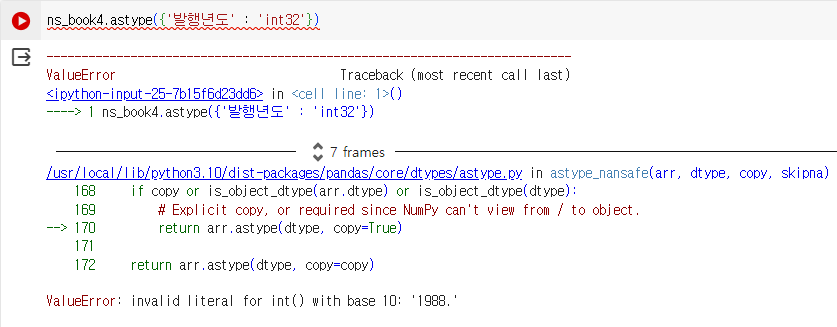

In [25]:
# 정규 표현식으로 다른 문자가 있는 연도 찾아보기
# contains()는 주어진 문자열이 포함된 모든 행을 찾아준다.
ns_book4['발행년도'].str.contains('1988').sum()

# ns_book4['발행년도'] == '1988' 은 1988 뒤에 문자가 더 있는 값은 찾을 수 없음

407

In [26]:
invalid_number = ns_book4['발행년도'].str.contains('\D', na = True)
print(invalid_number.sum())
ns_book4[invalid_number].head(10)

1777


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
19138,19565,단국강토,홍태수 저,매일경제신문사,1988.,9788974420031,,NaN,NaN,511.1,1,1,2019-12-19
19227,19736,삼성의 역사,송부웅 撰,삼양,단기4334[2001],9788985464369,,0,NaN,911.02,1,1,2019-12-06
26097,26812,배고픈 애벌레,에릭 칼 글·그림 ;이희재 옮김,더큰컴퍼니,[2019],9788959514083,,NaN,NaN,843,1,0,2019-08-12
29817,30586,(The) Sopranos sessions,"Matt Zoller Seitz,$eAlan Sepinwall,$eLaura Lip...",Harry N Abrams Inc,2019.,9781419734946,,NaN,NaN,326.76,1,0,2019-06-13
29940,30709,다음엔 너야,에른스트 얀들 글;노르만 융에 그림;박상순 옮김,비룡소,2018.,9788949110646,9788949110004,7,NaN,853,1,9,2019-06-04
29987,30756,핀테크 관련 최대수혜주의 핫 키워드와 이슈 모르면 주식 대박 힘들다,서울공대OB주식연구회 지음,비피기술거래,[2019],9791161822778,,1,NaN,327,1,5,2019-06-04
30838,31616,본격 한중일 세계사 5,굽시니스트 지음,위즈덤하우스,NaN,9791190065092,,NaN,NaN,NaN,0,0,2019-05-28
32500,33314,新분카일본어=Shin Bunka Japanese,文化外國語專門學校 日本語課程 저,시사일본어사,2003+,9788940271841,9788940271834,1,1,730,1,11,2019-05-03
32515,33329,너희가 영어발음을 아느냐,박희석;김정숙 [공]저,월드컴,[2000-2002],9788981274474,,1,NaN,741.1,3,66,2019-05-03
32928,33772,소공녀(중학교 영어로 다시 읽는 세계명작 New Collection.13),Frances Hodgson Burnett 원작 ;넥서스콘텐츠개발팀 엮음,넥서스,2011[실은 2012],9788957979457,9788957974674,1,13,747,1,3,2019-04-30


> na=True은 판다스의 str.contains() 함수에서 누락된 값(NaN)을 어떻게 처리할지를 지정합니다. na=True로 설정하면 누락된 값(NaN)을 유효한 입력으로 간주하고 에러를 발생시키지 않습니다. 이는 누락된 값이 있는 데이터셋을 다룰 때, 에러를 방지하고 코드를 더욱 안정적으로 만드는 데 도움이 됩니다.

- 예를 들어, 누락된 값이 있는 열에 str.contains()와 같은 문자열 연산을 적용하고 na=True를 지정하지 않으면, 누락된 값이 어떻게 처리될지 모르기 때문에 에러가 발생합니다. na=True를 설정함으로써 함수에게 누락된 값을 무시하도록 지시하는 것입니다. 이 매개변수는 데이터에서 누락된 값을 다룰 때 함수가 원활하게 작동하도록 보장합니다.

-  **판다스에서는 누락된 값을 문자열로 처리합니다. 따라서 str.contains()와 같은 문자열 연산을 수행할 때, 누락된 값(NaN)도 문자열로 간주됩니다. 따라서 na=True를 설정하면 누락된 값(NaN)도 유효한 문자열로 처리됩니다.**

In [34]:
ns_book5 = ns_book4.replace({'발행년도' : r'.*(\d{4}).*'}, r'\1', regex = True)
ns_book5[invalid_number].head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
19138,19565,단국강토,홍태수 저,매일경제신문사,1988,9788974420031,,NaN,NaN,511.1,1,1,2019-12-19
19227,19736,삼성의 역사,송부웅 撰,삼양,2001,9788985464369,,0,NaN,911.02,1,1,2019-12-06
26097,26812,배고픈 애벌레,에릭 칼 글·그림 ;이희재 옮김,더큰컴퍼니,2019,9788959514083,,NaN,NaN,843,1,0,2019-08-12
29817,30586,(The) Sopranos sessions,"Matt Zoller Seitz,$eAlan Sepinwall,$eLaura Lip...",Harry N Abrams Inc,2019,9781419734946,,NaN,NaN,326.76,1,0,2019-06-13
29940,30709,다음엔 너야,에른스트 얀들 글;노르만 융에 그림;박상순 옮김,비룡소,2018,9788949110646,9788949110004,7,NaN,853,1,9,2019-06-04


In [36]:
unknown_year = ns_book5['발행년도'].str.contains('\D', na = True)
print(unknown_year.sum())
ns_book5[unknown_year].head(10)

67


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
30838,31616,본격 한중일 세계사 5,굽시니스트 지음,위즈덤하우스,NaN,9791190065092,,NaN,NaN,NaN,0,0,2019-05-28
39130,40141,정책금융의 현황과 발전과제,정책금융연구회,한국산업은행,NaN,9788992784108,,NaN,NaN,327.1,1,0,2019-01-22
39256,40268,서울지역 유적 발굴조사 총서 3,서울역사박물관,서울역사박물관,NaN,9791186324714,9791186324431,NaN,NaN,NaN,0,0,2019-01-22
76836,81202,흰머리 큰줄기,한호진 지음,秀文出版社,[발행년불명],9788973010769,,0,NaN,699.1,1,1,2016-11-10
150543,160436,(속) 경제학사,박장환 지음,NaN,[20--],9788994339207,,1,NaN,320.9,1,2,2012-11-19
160738,170869,꽃들의 붉은 말 :대한민국 현대시인 12人選,"정성수,이길호,박명옥,신오선,김기수,박태수,한창희,박종수,나광호,이영환,한길석,강대...",예지,[발행년불명],9788996541721,,0,NaN,811.6,1,3,2012-06-01
182972,193527,삼손과 데릴라:학습용 VCD,월드무비 [제작],월드무비,[발행년불명],9788989603214,9788989603429,NaN,NaN,747,1,0,2011-05-09
182973,193529,닥터 지바고:학습용 VCD,월드무비 [제작],NaN,[발행년불명],9788989603085,,NaN,NaN,747,1,0,2011-05-09
182974,193530,닥터 지바고:학습용 VCD,월드무비 [제작],NaN,[발행년불명],9788989603078,,NaN,NaN,747,1,4,2011-05-09
182975,193532,마지막 황제:학습용 VCD,월드무비 [제작],NaN,[발행년불명],9788989603191,,NaN,NaN,747,1,0,2011-05-09


In [37]:
ns_book5.loc[unknown_year, '발행년도'] = '-1'
ns_book5 = ns_book5.astype({'발행년도' : 'int32'})

> string vs object dtype

판다스에서 데이터프레임의 열은 여러 가지 데이터 유형(dtype)을 가질 수 있습니다. dtype이 'object'인 열은 일반적으로 문자열, 숫자, 불리언 등 다양한 데이터 유형을 포함할 수 있는 유연한 데이터 유형입니다. 그러나 'string'은 별도의 데이터 유형으로 존재하지 않고, 'object'로 표시됩니다.

일반적으로 'object' 데이터 유형은 문자열과 다른 데이터 유형이 혼합된 열을 의미합니다. 예를 들어, 한 열에 문자열, 숫자, 불리언 값이 혼합되어 있을 때, 해당 열의 데이터 유형은 'object'가 됩니다.

반면에 'string'은 최근 버전의 판다스에서 도입된 데이터 유형으로, 문자열만을 저장하는 열에 사용됩니다. 'string' 데이터 유형은 문자열 전용 연산을 지원하여 문자열 데이터를 더 효율적으로 다룰 수 있도록 합니다.

따라서 'object'와 'string'의 주요 차이는 'string'은 문자열만을 저장하는 열에 사용되고, 문자열 전용 연산을 지원한다는 것입니다.

In [41]:
# 발행년도가 이상하게 크거나 이상하게 작은 값을 변경
ns_book5['발행년도'].loc[ns_book5['발행년도'] >= 4000]

91004     4331
91005     4331
122467    4347
126287    4330
150544    4345
          ... 
380156    4328
380297    4327
380508    4327
381806    4327
382737    4326
Name: 발행년도, Length: 131, dtype: int32

In [44]:
# gt() : 전달된 값보다 큰 값을 찾음
ns_book5['발행년도'].gt(4000).sum()

131

In [45]:
# 단군기원을 사용했다고 판단하고, 2333 을 빼준다.
dangun_yy_rows = ns_book5['발행년도'].gt(4000)
ns_book5.loc[dangun_yy_rows, '발행년도'] = ns_book5.loc[dangun_yy_rows, '발행년도'] - 2333
dangun_year = ns_book5['발행년도'].gt(4000)
print(dangun_year.sum())
ns_book5[dangun_year].head(2)

13


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
222858,234268,Modern art,[computer file],GROLIER,7611,9780717233243,,NaN,NaN,609.205,1,1,2009-05-07
270269,282852,현대 영어학=Linguistic theory in modern english,이재영,열림기획,7634,9788986705072,,1,NaN,740.1,1,6,2007-04-14


In [46]:
ns_book5.loc[dangun_year, '발행년도'] = -1

In [47]:
old_books = ns_book5['발행년도'].gt(0) & ns_book5['발행년도'].lt(1900)
ns_book5[old_books]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
61149,64093,"고흐 씨, 시 읽어 줄까요 :내 마음을 알아주는 시와 그림의 만남",이운진 지음,사계절,176,9788958284277,,0,NaN,811.7,1,6,2017-10-27
70566,74347,정신 병리학의 문제들,지은이: 지그문트 프로이트 ;옮긴이: 황보석,열린책들,151,9788932905181,9788932905082,9,10,185.5,1,4,2017-04-26
79550,84164,(최근 7년간) 중요 민법판례 :[2009년 1월~2016년 6월 중요 판례],이광섭 편저,법학사,163,9788962898651,,9,NaN,365,1,14,2016-09-27
147950,157759,(한·중·일) 밥상 문화 :대표음식으로 본 3국 문화비교,김경은 지음,이가서,132,9788958643012,,0,NaN,381.75,1,30,2013-02-19
194576,205407,책으로 뒤덮인 집의 비밀,N.E. 보드 지음 ;피터 퍼거슨 그림 ;김지현 옮김,개암나무,1015,9788992844413,,7,NaN,843,1,15,2010-08-18
287252,300283,(밝혀질)우리歷史,吳在城 著,黎民族史硏究會,1607,9788986892130,,0,NaN,911,1,5,2006-07-06


In [48]:
ns_book5.loc[old_books, '발행년도'] = -1

In [49]:
ns_book5['발행년도'].eq(-1).sum()

86

- 도서명, 저자, 출판사, 발행년도 열이 분석에 중요하다고 판단 => 이 4개의 값에는 누락된 값이 있으면 절대 안 된다.


In [71]:
na_rows = ns_book5['도서명'].isna() | ns_book5['저자'].isna() | ns_book5['출판사'].isna()| ns_book5['발행년도'].eq(-1)
print(na_rows.sum())
ns_book5[na_rows].head(5)

5268


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
78,79,아산 정주영 레거시,김화진,NaN,2021,9788952129529,,NaN,NaN,325,1,1,2021-03-15
265,278,골목의 시간을 그리다,정명섭.김효찬 지음,NaN,2021,9791191266054,,NaN,NaN,NaN,1,0,2021-03-12
354,367,한국인의 맛,정명섭 지음,NaN,2021,9791155401804,,NaN,NaN,NaN,1,0,2021-03-12
539,552,"한성부, 달 밝은 밤에",김이삭 지음,NaN,2021,9791163161479,,NaN,NaN,NaN,1,0,2021-03-12
607,620,100일 완성 마그마 러시아어 중고급 단어장,러포자 구제 연구소 외 지음,NaN,2021,9788974829193,,NaN,NaN,NaN,1,0,2021-03-12


## beautiful Soup을 사용해 값들을 채운다.

In [51]:
import requests
from bs4 import BeautifulSoup

In [68]:
def get_book_title(isbn):
  url = 'https://www.yes24.com/Product/Search?domain=ALL&query={}'
  r = requests.get(url.format(isbn))
  soup = BeautifulSoup(r.text, 'html.parser')
  title = soup.find('a', attrs = {'class' : 'gd_name'}).get_text(strip=True)
  return title

In [69]:
get_book_title(9788952129529)

'아산 정주영 레거시'

In [70]:
get_book_title(9791191266054)

'골목의 시간을 그리다'

> 저자가 2명 이상인 경우

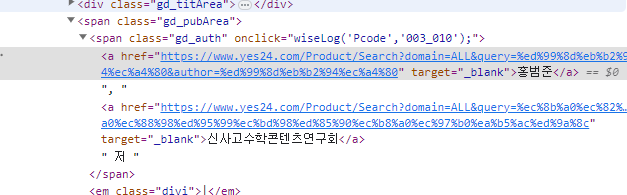

In [73]:
import re

def get_book_info(row):
  title = row['도서명']
  author = row['저자']
  pub = row['출판사']
  year = row['발행년도']
  url = 'https://www.yes24.com/Product/Search?domain=ALL&query={}'
  r = requests.get(url.format(row['ISBN']))
  soup = BeautifulSoup(r.text, 'html.parser')
  try:
    if pd.isna(title) :
      title = soup.find('a', attrs = {'class' : 'gd_name'}).get_text()
  except AttributeError:
    pass

  try:
    if pd.isna(author):
      # 클래스 이름이 'info_auth'인 span 태그 아래 a 태그의 텍스트를 가져옵니다.
      authors = soup.find('span', attrs={'class':'info_auth'}).find_all('a')
      author_list = [auth.get_text() for auth in authors]
      author = ','.join(author_list)
  except AttributeError:
    pass

  try:
    if pd.isna(pub):
      # 클래스 이름이 'info_auth'인 span 태그 아래 a 태그의 텍스트를 가져옵니다.
      pub = soup.find('span', attrs={'class':'info_pub'}).find('a').get_text()
  except AttributeError:
    pass

  try:
    if year == -1:
      # 클래스 이름이 'info_date'인 span 태그 아래 텍스트를 가져옵니다.
      year_str = soup.find('span', attrs={'class':'info_date'}).get_text()
      year = re.findall(r'\d{4}', year_str)[0]
  except AttributeError:
                           pass
  return title, author, pub, year

In [74]:
# axis = 1 : 각 행에
# apply 메서드는 기본적으로 반환된 값을 하나의 튜플로 반환
# 따라서 result_type = 'expand' => 반환된 값을 각기 다른 열로 만들어준다.
updated_sample = ns_book5[na_rows].head(2).apply(get_book_info, axis = 1, result_type = 'expand')

In [75]:
updated_sample

,0,1,2,3
78,아산 정주영 레거시,김화진,서울대학교출판문화원,2021
265,골목의 시간을 그리다,정명섭.김효찬 지음,초록비책공방,2021


In [77]:
# ns_book5_update = ns_book5[na_rows].apply(get_book_info, axis=1, result_type ='expand')

# ns_book5_update.columns = ['도서명','저자','출판사','발행년도']
# ns_book5_update.head()

In [78]:
gdown.download('http://bit.ly/3UJZiHw', 'ns_book5_update.csv', quiet=False)

ns_book5_update = pd.read_csv('ns_book5_update.csv', index_col=0)
ns_book5_update.head()

Downloading...
From: http://bit.ly/3UJZiHw
To: /content/ns_book5_update.csv
100%|██████████| 406k/406k [00:00<00:00, 25.1MB/s]


,도서명,저자,출판사,발행년도
78,아산 정주영 레거시,김화진,서울대학교출판문화원,2021
265,골목의 시간을 그리다,정명섭.김효찬 지음,초록비책공방,2021
354,한국인의 맛,정명섭 지음,추수밭,2021
539,"한성부, 달 밝은 밤에",김이삭 지음,고즈넉이엔티,2021
607,100일 완성 마그마 러시아어 중고급 단어장,러포자 구제 연구소 외 지음,문예림,2021


In [79]:
ns_book5.update(ns_book5_update)

na_rows = ns_book5['도서명'].isna() | ns_book5['저자'].isna() | ns_book5['출판사'].isna() | ns_book5['발행년도'].eq(-1)
print(na_rows.sum())

4615


In [80]:
# 전처리를 해주고도 NaN이 남은 행들은 삭제
ns_book6 = ns_book5.dropna(subset=['도서명','저자','출판사'])
ns_book6 = ns_book6[ns_book6['발행년도'] != -1]
ns_book6.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,,NaN,NaN,NaN,1,0,2021-03-19


In [83]:
ns_book6.to_csv('ns_book6.csv', index = False)

In [ ]:
# final function
def data_fixing(ns_book4):
    """
    잘못된 값을 수정하거나 NaN 값을 채우는 함수

    :param ns_book4: data_cleaning() 함수에서 전처리된 데이터프레임
    """
    # 도서권수와 대출건수를 int32로 바꿉니다.
    ns_book4 = ns_book4.astype({'도서권수':'int32', '대출건수': 'int32'})
    # NaN인 세트 ISBN을 빈문자열로 바꿉니다.
    set_isbn_na_rows = ns_book4['세트 ISBN'].isna()
    ns_book4.loc[set_isbn_na_rows, '세트 ISBN'] = ''

    # 발행년도 열에서 연도 네 자리를 추출하여 대체합니다. 나머지 발행년도는 -1로 바꿉니다.
    ns_book5 = ns_book4.replace({'발행년도':'.*(\d{4}).*'}, r'\1', regex=True)
    unkown_year = ns_book5['발행년도'].str.contains('\D', na=True)
    ns_book5.loc[unkown_year, '발행년도'] = '-1'

    # 발행년도를 int32로 바꿉니다.
    ns_book5 = ns_book5.astype({'발행년도': 'int32'})
    # 4000년 이상인 경우 2333년을 뺍니다.
    dangun_yy_rows = ns_book5['발행년도'].gt(4000)
    ns_book5.loc[dangun_yy_rows, '발행년도'] = ns_book5.loc[dangun_yy_rows, '발행년도'] - 2333
    # 여전히 4000년 이상인 경우 -1로 바꿉니다.
    dangun_year = ns_book5['발행년도'].gt(4000)
    ns_book5.loc[dangun_year, '발행년도'] = -1
    # 0~1900년 사이의 발행년도는 -1로 바꿉니다.
    old_books = ns_book5['발행년도'].gt(0) & ns_book5['발행년도'].lt(1900)
    ns_book5.loc[old_books, '발행년도'] = -1

    # 도서명, 저자, 출판사가 NaN이거나 발행년도가 -1인 행을 찾습니다.
    na_rows = ns_book5['도서명'].isna() | ns_book5['저자'].isna() \
              | ns_book5['출판사'].isna() | ns_book5['발행년도'].eq(-1)
    # 교보문고 도서 상세 페이지에서 누락된 정보를 채웁니다.
    updated_sample = ns_book5[na_rows].apply(get_book_info,
        axis=1, result_type ='expand')
    updated_sample.columns = ['도서명','저자','출판사','발행년도']
    ns_book5.update(updated_sample)

    # 도서명, 저자, 출판사가 NaN이거나 발행년도가 -1인 행을 삭제합니다.
    ns_book6 = ns_book5.dropna(subset=['도서명','저자','출판사'])
    ns_book6 = ns_book6[ns_book6['발행년도'] != -1]

    return ns_book6